In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [17]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [35]:
print(df.columns)


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [59]:

label_enc = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # replace missing
    df[col] = label_enc.fit_transform(df[col].astype(str))

X = df.drop("Exited", axis=1)
y = df["Exited"]

# Scale features
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print(accuracy)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)



0.8655


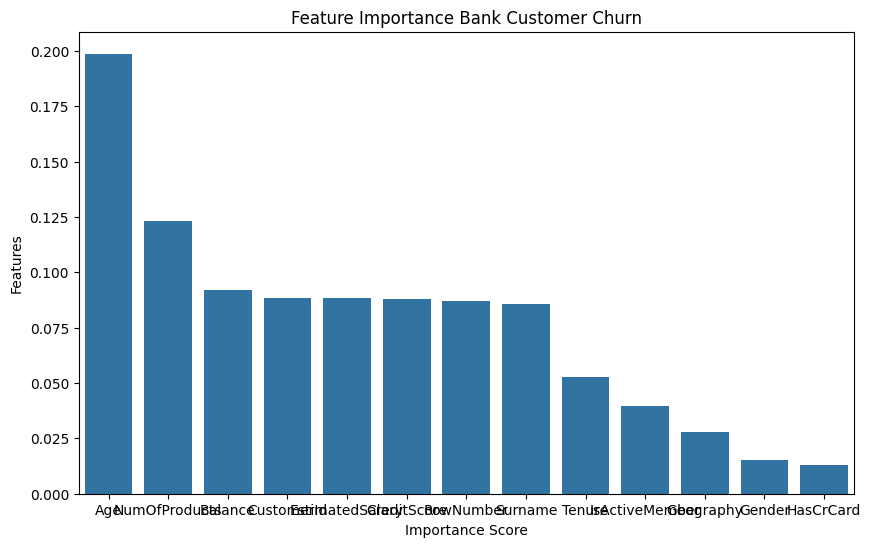

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.index, y=importances.values)
plt.title("Feature Importance Bank Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()